In [1]:
#mengimport library 
import pandas as pd
import numpy as np
#lib plotting gambar
import matplotlib.pyplot as plt
import seaborn as sns

import random
from random import seed
from random import random

In [12]:
iris = pd.read_csv('Iris.csv')

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris = iris.drop(['Id'], axis = 1)
colname=['x1','x2','x3','x4','species']
iris.columns = colname
iris['species']= iris.species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0.0,1.0,2.0])

In [15]:
iris.head()

,x1,x2,x3,x4,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


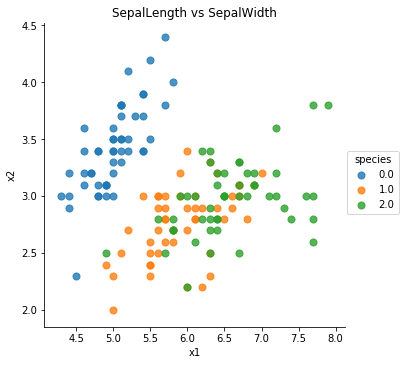

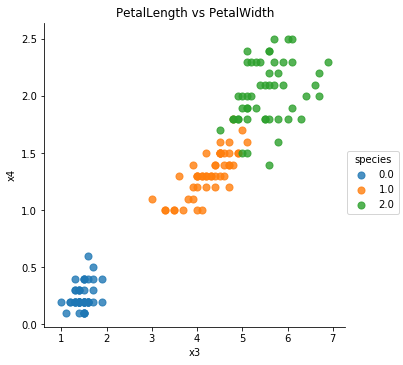

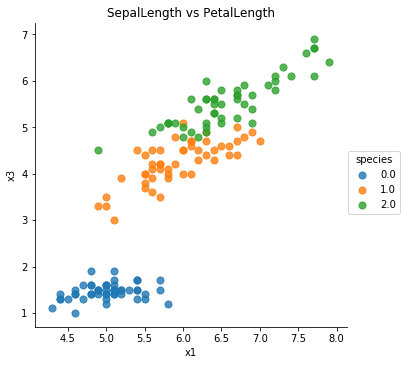

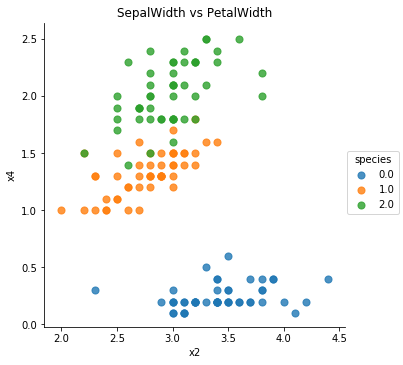

In [16]:
#sebaran dataset
#visualisasi dataset Iris 

sns.lmplot('x1', 'x2',
           data=iris,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('x3', 'x4',
           data=iris,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('x1', 'x3',
           data=iris,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('x2', 'x4',
           data=iris,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [17]:
#result per neuron
def calcresult(weight, theta):
  result = weight[-1]
  for i in range(len(weight)-1):
    result += weight[i] * theta[i]
  return result

#fungsi aktivasi sigmoid 
def activation(x):
  return 1/(1+np.exp(-x))

#fungsi untuk menghitung w berikutnya
def delta(output):
    return output * (1.0 - output)

#fungsi menghitung error
def er(actual, predicted):
    error = 1/2*(predicted - actual)**2
    return error

#fungsi prediksi, jika >= 0.5 dibulatkan ke atas 
def pred(activation):    
  if activation >= 0.5:
    prediction = 1.0
  else: 
    prediction = 0.0
  return prediction  
    
# Menginisialisasi weight dari network
def inisialisasi(nInput, nHidden, nOut):
  net = list()
  hiddenlayer = [{'w':[random() for i in range(nInput + 1)]} for i in range(nHidden)]
  outputlayer = [{'w':[random() for i in range(nHidden + 1)]} for i in range(nOut)]
  net.append(hiddenlayer)
  net.append(outputlayer)
  return net

# Fungsi untuk feedforward dari input ke output
def feedforward(net, row):
    inputs = row
    for layer in net:
        nextinput = []
        for n in layer:
            result = calcresult(n['w'], inputs)
            n['out'] = activation(result)
            nextinput.append(n['out'])
        inputs = nextinput
    return inputs

# Fungsi untuk backpropagation 
def backprop(network, target):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
    #untuk hidden layer
        if i != len(network)-1:
            for j in range(len(layer)):
                e = 0.0
                for n in network[i + 1]:
                    e += (n['w'][j] * n['delta'])
                errors.append(e)
        else:
      #untuk layer output, errornya langsung target-prediksi 
            for j in range(len(layer)):
                n = layer[j]
                errors.append(target[j] - n['out'])
        for j in range(len(layer)):
      #rumus deltanya menjadi target-prediksi * 1-prediksi*prediksi 
            n = layer[j]
            n['delta'] = errors[j] * delta(n['out'])
      
    #update weight

def updateweight(network, row, lr):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['out'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
        #rumus update weight w = w + lr *dtheta 
        # dtheta = delta * input  
                neuron['w'][j] += lr * neuron['delta'] * inputs[j]
      #untuk bias, tidak dikali dengan input dthetanya 
            neuron['w'][-1] += lr * neuron['delta']

#akurasi    
def accuracymetric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

In [18]:
# Fungsi untuk training netwrok

def trainnetwork(network, train, lr, epoch, n_out):
  #errr = []
  for ep in range(epoch):
    true = 0
    sumerror = 0 
    exp=[]
    pred=[]
    for row in train:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #karena target bentuknya kategorikal 0,1,2 maka dibentuk one hot encoding
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      backprop(network, expected)
      updateweight(network, row, lr)
      
      #membuat prediksi dari hasil aktivasi
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        true +=1
       
    errr.append(sumerror/len(train))
     
    acc.append(true/len(train))

In [22]:
#mengubah menjadi bentuk matrix agar mempercepat komputasi (tidak dalam dataframe)
irismatrix = iris.as_matrix()
seed(10)
data = irismatrix.tolist()
np.random.shuffle(data)

In [59]:
data

[[6.2, 2.2, 4.5, 1.5, 1.0],
 [7.3, 2.9, 6.3, 1.8, 2.0],
 [5.0, 3.4, 1.6, 0.4, 0.0],
 [4.5, 2.3, 1.3, 0.3, 0.0],
 [6.5, 3.0, 5.2, 2.0, 2.0],
 [6.7, 3.1, 4.4, 1.4, 1.0],
 [5.5, 2.4, 3.7, 1.0, 1.0],
 [6.1, 3.0, 4.6, 1.4, 1.0],
 [4.3, 3.0, 1.1, 0.1, 0.0],
 [7.7, 3.8, 6.7, 2.2, 2.0],
 [5.6, 2.9, 3.6, 1.3, 1.0],
 [5.2, 2.7, 3.9, 1.4, 1.0],
 [5.8, 2.6, 4.0, 1.2, 1.0],
 [6.8, 3.0, 5.5, 2.1, 2.0],
 [4.4, 3.0, 1.3, 0.2, 0.0],
 [7.6, 3.0, 6.6, 2.1, 2.0],
 [5.9, 3.0, 4.2, 1.5, 1.0],
 [5.2, 4.1, 1.5, 0.1, 0.0],
 [6.5, 3.0, 5.8, 2.2, 2.0],
 [7.2, 3.0, 5.8, 1.6, 2.0],
 [6.0, 2.2, 4.0, 1.0, 1.0],
 [5.8, 2.7, 3.9, 1.2, 1.0],
 [5.5, 2.3, 4.0, 1.3, 1.0],
 [5.1, 3.8, 1.5, 0.3, 0.0],
 [5.4, 3.0, 4.5, 1.5, 1.0],
 [6.9, 3.1, 4.9, 1.5, 1.0],
 [5.7, 2.6, 3.5, 1.0, 1.0],
 [6.7, 3.1, 5.6, 2.4, 2.0],
 [7.7, 2.6, 6.9, 2.3, 2.0],
 [5.1, 3.8, 1.9, 0.4, 0.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [6.4, 3.2, 5.3, 2.3, 2.0],
 [6.4, 2.7, 5.3, 1.9, 2.0],
 [5.8, 2.7, 5.1, 1.9, 2.0],
 [5.8, 2.8, 5.1, 2.4, 2.0],
 [4.7, 3.2, 1.6, 0.2

In [42]:
#Split dataset 80% training, 20% validasi 
total=len(data)
lentrain=int(0.8*total)
lenval=int(0.2*total)

train = data[:lentrain]
val = data[lentrain:]

In [43]:
# Training backprop algorithm
errr=[]
acc=[]
seed(2019)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
    print(layer)

[{'w': [-0.38379150202381113, -1.4204898700164281, 0.87066563120426266, 3.551373402005729, -1.6313741187466448], 'out': 0.66878093968661922, 'delta': -0.059569056765836029}, {'w': [0.5393109022492858, 0.68884953315038211, 0.92996533375454904, 0.1276102015654538, 0.13039058284640631], 'out': 0.99997652048149033, 'delta': 2.1551419222318221e-06}]
[{'w': [-10.693744477883149, 0.15146943965504167, 1.8715896391625237], 'out': 0.0058893169973336544, 'delta': -3.4479789302230888e-05}, {'w': [0.31219255501231397, -0.12074869376384255, -0.76352693681068762], 'out': 0.32921551043202946, 'delta': 0.14813112185897989}, {'w': [10.351199447809563, -3.6910583892766442, -4.6633523661960359], 'out': 0.194001570280525, 'delta': -0.030335047972640874}]


In [45]:
# Fungsi untuk training netwrok

def valnetwork(network, val, lr, epoch, n_out):
  #errr = []
  for ep in range(epoch):
    true = 0
    sumerror = 0 
    exp=[]
    pred=[]
    for row in train:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #untuk bikin one hot encodingnya
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      backprop(network, expected)
      
      #membuat prediksi dari hasil aktivasi
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        true +=1
       
    errval.append(sumerror/len(train))
    
    accval.append(true/len(train))
  print(errval)
  
  print(accval)

In [46]:
# Validasi backprop algorithm
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 2, n_outputs)
valnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
    print(layer)

[0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.13208038907929848, 0.1320803890

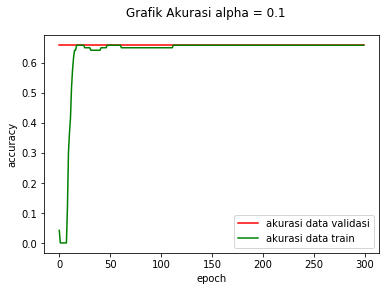

In [47]:
#grafik akurasi 
x=plt.figure()
plt.suptitle('Grafik Akurasi alpha = 0.1')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accval,'r')
plt.plot(acc,'g')
plt.gca().legend(('akurasi data validasi','akurasi data train'))
y=plt.figure()  

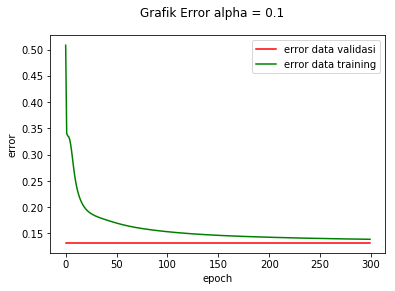

In [50]:
#grafik error 
plt.suptitle('Grafik Error alpha = 0.1')
plt.xlabel('epoch')
plt.ylabel('error')
plt.plot(errval,'r')
plt.plot(errr,'g')  
plt.gca().legend(('error data validasi','error data training'))

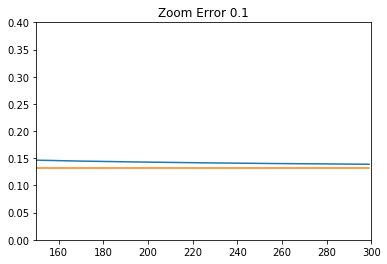

In [51]:
axzoom = plt.subplot()
axzoom.set(xlim=(150, 300), ylim=(0,0.4), autoscale_on=False,
           title='Zoom Error 0.1')
axzoom.plot(errr)
axzoom.plot(errval)

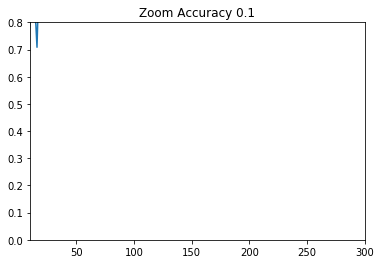

In [62]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(10, 300), ylim=(0.0,0.8), autoscale_on=False,
           title='Zoom Accuracy 0.1')
axzoom.plot(acc)
axzoom.plot(accval)

In [53]:
# Training backprop algorithm
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-0.95994051120082968, -2.1453421276404541, 4.0998534866734815, 2.2828115440076564, -0.25324932446452253], 'out': 0.99982087120762642, 'delta': 1.3863167989724973e-06}, {'w': [-21.03058341100521, -18.748426589499868, 31.022183688658473, 32.170777353385169, -20.584448906414263], 'out': 8.9692345903719983e-17, 'delta': -1.0838255797800693e-18}]
[{'w': [-8.8765920673853156, -2.5990036958832401, 4.3557932583630761], 'out': 0.01078212657618036, 'delta': -0.00011500078542846695}, {'w': [7.6754688985125936, -5.7455598820870106, -4.3197296185585996], 'out': 0.96618979238186709, 'delta': 0.0011044806718409894}, {'w': [1.6797936901755119, 5.7756546671476716, -5.0627868964790563], 'out': 0.032874784189603698, 'delta': -0.0010452219653079224}]


In [54]:
# Validasi backprop algorithm
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 2, n_outputs)
valnetwork(network, dataset, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

[0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.010782780016083921, 0.0107827

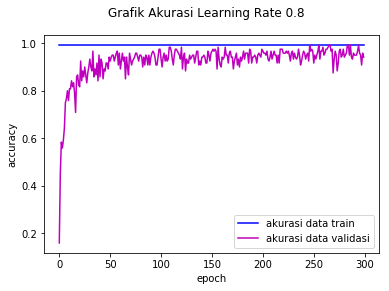

In [55]:
#grafik akurasi 
x=plt.figure()
plt.suptitle('Grafik Akurasi Learning Rate 0.8')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accval,'-b')
plt.plot(acc,'-m')
plt.gca().legend(('akurasi data train','akurasi data validasi'))
y=plt.figure()  

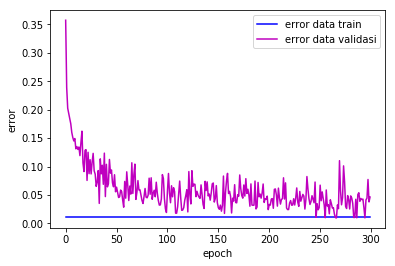

In [56]:
#grafik error 
y.suptitle('Grafik Error Learning Rate 0.8')
plt.xlabel('epoch')
plt.ylabel('error')
plt.plot(errval,'-b')
plt.plot(errr,'-m')  
plt.gca().legend(('error data train','error data validasi'))


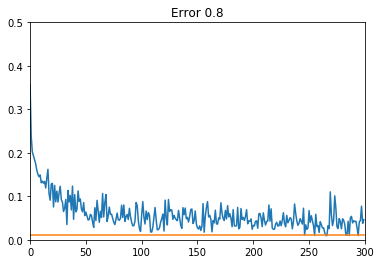

In [57]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error 0.8')
axzoom.plot(errr)
axzoom.plot(errval)

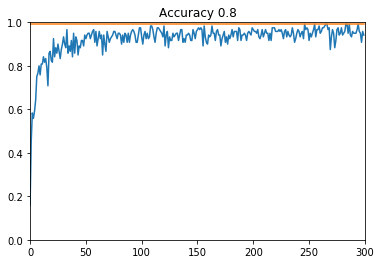

In [58]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy 0.8')
axzoom.plot(acc)
axzoom.plot(accval)